In [1]:
import h5py
import numpy as np
import os
import pandas as pd
from pathlib import Path
import scipy
import subprocess
import time

from os import listdir
from os.path import isfile, join

import matplotlib
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../code')
import fit_bias_params as fbp

2024-01-16 00:28:44.209691: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 00:28:44.465177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 00:28:44.465299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 00:28:44.498509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 00:28:44.582606: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-16 00:28:44.584394: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

#matplotlib.rc('text', usetex=True)

In [3]:
alpha = 0.5
color_mode = 'discrete'

In [4]:
save_figs = False
plot_dir = '../plots/2023-01-08_figures'
Path(plot_dir).mkdir(parents=True, exist_ok=True)
plot_tag = '_inemubounds'
tag_bpfit = ''

## Set up CAMELS-SAM params

In [5]:
redshift = 0
dir_dat = '/lscratch/kstoreyf/CAMELS-SAM_data'

In [6]:
fn_idxs = '../data/idxs_camelssam_in_emu_bounds.dat'
idxs_sam = np.loadtxt(fn_idxs, dtype=int)

#idxs_sam = [idx_sam for idx_sam in np.arange(0, 1000) if isfile(f'{dir_dat}/LH_{idx_sam}_galprops_z{redshift}.hdf5')]

In [7]:
n_sams = len(idxs_sam)
print(n_sams)

169


## Load P(k)'s

In [8]:
ndens_target = 0.003
tag_pk = f'_n{ndens_target}'

In [9]:
pks = []

for idx_sam in idxs_sam:
    fn_pk = f'../data/pks/pks{tag_pk}/pk_LH_{idx_sam}.npy'
    pk = np.load(fn_pk, allow_pickle=True).item()
    pks.append(pk)

In [10]:
colors = ['b']*len(pks)

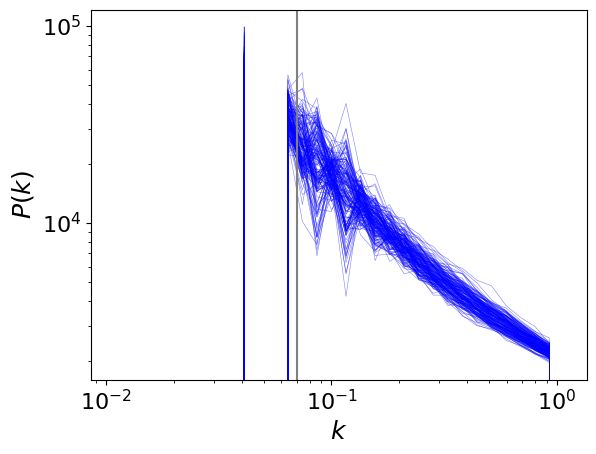

In [11]:
for i in range(n_sams):
    plt.plot(pks[i]['k'], pks[i]['pk'], lw=0.4, color=colors[i], alpha=alpha)
    
if color_mode=='continuous':
    ax = plt.gca()
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=locs_norm)
    plt.colorbar(sm, ax=ax, label=r'$\bar{\sigma}_\text{SMF}$')
    
plt.axvline(0.07, color='grey')    

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$P(k)$')

if save_figs:
    plt.savefig(f'{plot_dir}/pks{plot_tag}.png')

# setup bias param fitter

In [12]:
#fbp.initializer()
emulator = fbp.load_emulator()

Loading emulator
Loading l-bias lpt emulator...


/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when u

/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.24.2 when u

L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...


/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 w

Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.


/dipc/kstoreyf/.conda/envs/baccoenv/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [13]:
cosmo_params = fbp.setup_cosmo_emu()
vol = (100/cosmo_params['hubble'])**3 

Setting up emulator cosmology


In [36]:
overwrite = True
n_threads = 1
ndens_target = 0.003
redshift = 0
dir_dat = '/lscratch/kstoreyf/CAMELS-SAM_data'
#idxs_sam = [idx_sam for idx_sam in np.arange(0, 1000) \
#            if os.path.isfile(f'{dir_dat}/LH_{idx_sam}_galprops_z{redshift}.hdf5')]

fn_idxs = '../data/idxs_camelssam_in_emu_bounds.dat'
idxs_sam_inbounds = np.loadtxt(fn_idxs, dtype=int)
#idxs_sam_inbounds = idxs_sam_inbounds[:1]
idx_sam = idxs_sam_inbounds[3]

print(f'{len(idxs_sam_inbounds)} of SAMs have cosmo params in bounds') 
fn_params = '../data/params_CAMELS-SAM.dat'
df_params = pd.read_csv(fn_params, index_col='idx_LH')

tag_pk = f'_n{ndens_target}'
dir_bp = f'../data/bias_params/bias_params{tag_pk}'
Path(dir_bp).mkdir(parents=True, exist_ok=True)

#fit_bias_params_loop(idxs_sam_inbounds, df_params, tag_pk, n_threads=n_threads, overwrite=overwrite)

169 of SAMs have cosmo params in bounds


In [37]:
redshift = 0
dir_dat = '/lscratch/kstoreyf/CAMELS-SAM_data'
fn_dat = f'{dir_dat}/LH_{idx_sam}_galprops_z{redshift}.hdf5'
if not os.path.isfile(fn_dat):
    print(f"[SAM LH {idx_sam}] Data file {fn_dat} does not exist! Moving on")

fn_pk = f'../data/pks/pks{tag_pk}/pk_LH_{idx_sam}.npy'
if not os.path.isfile(fn_pk):
    print(f"[SAM LH {idx_sam}] P(k) file {fn_pk} does not exist! Moving on")

fn_bp = f'../data/bias_params/bias_params{tag_pk}/bias_params_LH_{idx_sam}.npy'
if os.path.isfile(fn_bp) and not overwrite:
    print(f"[SAM LH {idx_sam}] Bias param file {fn_bp} already exists and overwrite={overwrite}! Moving on")

In [75]:
Omega_m = df_params.loc[idx_sam, 'Omega_m']
sigma_8 = df_params.loc[idx_sam, 'sigma_8']
cosmo_params['omega_cold'] = Omega_m
cosmo_params['sigma8_cold'] = sigma_8

print("Loading pk, setting up cov, etc")
pk = np.load(fn_pk, allow_pickle=True).item()

# with h5py.File(fn_dat, 'r') as f:
#     nbar = len(f['mstar'])/vol

k_sam_all = pk['k']
i_bins = (k_sam_all > 0.1) & (k_sam_all < 0.75) #bc emulator can't go above this
k_sam = k_sam_all[i_bins]
#C_inv = np.diag(np.ones(len(k_sam))/len(k_sam))
pk_sam = pk['pk'][i_bins]

err_poisson = pk['shotnoise'][i_bins]
err_1p = 0.01*pk_sam
variance = err_poisson**2 + err_1p**2

Loading pk, setting up cov, etc


In [76]:
pk['nmodes']

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           6,     1,     1,    12,     8,     6,    48,    12,    78,
          80,   186,   182,   402,   554,   942,  1370,  2144,  3404,
        5336,  8212, 12746, 20074,     1])

In [77]:
pk['nmodes'][i_bins]

array([  12,   78,   80,  186,  182,  402,  554,  942, 1370, 2144, 3404,
       5336, 8212])

In [78]:
pk['shotnoise']

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 1102.85157316,    0.        ,    0.        ,
       1102.85156618, 1102.85155919, 1102.85149179, 1102.85148131,
       1102.85140343, 1102.85138813, 1102.85130216, 1102.85131514,
       1102.8512972 , 1102.85130176, 1102.85131176, 1102.85142235,
       1102.85152563, 1102.85175179, 1102.85206914, 1102.852441  ,
       1102.85313707, 1102.85440247, 1102.85670091,    0.        ])

In [79]:
print(err_poisson)
print(err_1p)
print(np.sqrt(variance))

[1102.85140343 1102.85138813 1102.85130216 1102.85131514 1102.8512972
 1102.85130176 1102.85131176 1102.85142235 1102.85152563 1102.85175179
 1102.85206914 1102.852441   1102.85313707]
[114.41210286 130.65763417  86.38542419  85.90271997  75.32127276
  67.41573349  53.88465404  48.16572424  44.55449889  40.05456988
  33.85192489  32.12333461  28.24326006]
[1108.77019591 1110.56409165 1106.22937775 1106.191801   1105.42040775
 1104.90989448 1104.16691302 1103.90271165 1103.7511454  1103.57888481
 1103.3714874  1103.32017803 1103.21472238]


In [80]:
free_param_names = ['b1', 'b2', 'bs2', 'bl', 'Asn']
bounds = fbp.get_bounds(free_param_names)
# ndens_target in mpc/h, need nbar in mpc to match pk
# Mpc = Mpc/h * h
nbar = ndens_target * cosmo_params['hubble']**3

In [81]:
ndens_target, nbar

(0.003, 0.000906740410293)

In [82]:
#free_params_0 = [0.5, 0.0, 1.25, -0.5, 1.0]
free_params_0 = [1, 0.0, 1.25, -0.5, 1.0]
#free_params_0 = [0.5, 0.3, 1.1, -0.5, 1.0]
res = scipy.optimize.minimize(fbp.neg_ln_like, free_params_0, 
                              method='L-BFGS-B', 
                              #method='Nelder-Mead',
                              bounds=bounds, #tol=1e-10,
                              args=(k_sam, pk_sam, variance, nbar, emulator, cosmo_params))
print(res['x'])
print(res)

[ 0.12597205 -1.14862602  3.95638725 -2.45070568  0.        ]
  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.472644469907997
        x: [ 1.260e-01 -1.149e+00  3.956e+00 -2.451e+00  0.000e+00]
      nit: 118
      jac: [-7.239e-06 -8.882e-07 -4.574e-06  6.217e-07  4.646e-02]
     nfev: 900
     njev: 150
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


Text(0.5, 0, '$k$')

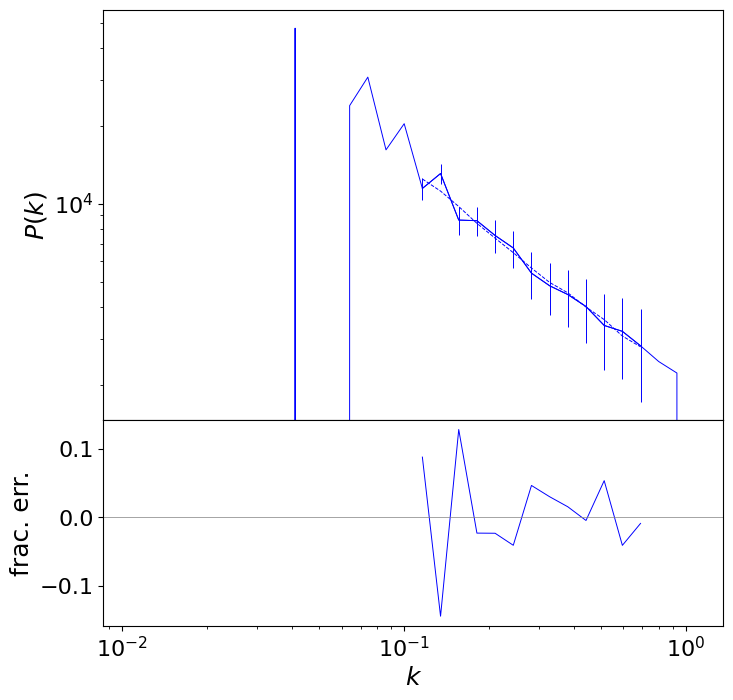

In [83]:
nrows, ncols = 2, 1
fig, axarr = plt.subplots(nrows, ncols, figsize=(8,8), sharex=True, height_ratios=[2,1])
plt.subplots_adjust(hspace=0)

axarr[0].plot(pk['k'], pk['pk'], lw=0.7, color=colors[i])
#bias_params = res_arr[i]['x'][:4]
bias_params = res['x'][:4]
A_sn = res['x'][-1]
_, pk_gg, _ = emulator.get_galaxy_real_pk(bias=bias_params, k=k_sam, **cosmo_params)
pk_emu = pk_gg + A_sn/nbar
axarr[0].errorbar(k_sam, pk_sam, yerr=np.sqrt(variance), lw=0.7, ls='-', color=colors[i])
axarr[0].plot(k_sam, pk_emu, lw=0.7, ls='--', color=colors[i])
axarr[0].set_ylabel(r'$P(k)$')

axarr[1].plot(k_sam, (pk_emu-pk_sam)/pk_sam, lw=0.7, color=colors[i])
axarr[1].set_ylabel('frac. err.')
axarr[1].axhline(0, color='grey', lw=0.5)

plt.xscale('log')
axarr[0].set_yscale('log')
plt.xlabel(r'$k$')